In [34]:
import pandas as pd

In [35]:
import matplotlib.pylab as plt 

In [36]:
mavoix=pd.read_csv("C:/Users/elcot/Downloads/mavoix_ml_sample_dataset.csv",encoding="ISO-8859-10")

In [37]:
mavoix.head()

,Application_ID,Current City,Python (out of 3),R Programming (out of 3),Deep Learning (out of 3),PHP (out of 3),MySQL (out of 3),HTML (out of 3),CSS (out of 3),JavaScript (out of 3),...,Node.js (out of 3),ReactJS (out of 3),Other skills,Degree,Stream,Current Year Of Graduation,Performance_PG,Performance_UG,Performance_12,Performance_10
0,ML0001,Bangalore,0,2,0,2,0,2,3,2,...,0,0,R Programming,Bachelor of Science (B.Sc),Mathematics,2017,NaN,NaN,NaN,NaN
1,ML0002,Bangalore,2,0,0,2,2,2,2,2,...,0,0,"Data Science, Machine Learning, Neural Network...",Bachelor of Technology (B.Tech),Computer Science & Engineering,2019,NaN,85.50/100,92.20/92.20,96.60/96.60
2,ML0003,Bangalore,3,0,1,2,2,2,0,2,...,0,0,"Algorithms, Data Structures, Python, C Program...",Master of Science (M.Sc),Computer Science,2018,7.91/10,70.00/100,64.83/64.83,77.60/77.60
3,ML0004,Bangalore,2,0,2,1,0,2,0,0,...,0,0,"CSS, Deep Learning, Embedded Systems, HTML, Ma...",Bachelor of Engineering (B.E),Electronics and Communication,2019,NaN,6.86/10,76.00/76.00,84.32/84.32
4,ML0005,Bangalore,2,0,0,2,0,2,1,1,...,2,2,"HTML, OpenCV, Python, SQL, C++ Programming, CS...",Bachelor of Technology (B.Tech),Production Engineering,2018,NaN,6.38/10,65.20/65.20,68.80/68.80


In [38]:
def norm_func(i):
    x = (i-i.mean())/(i.std())
    return (x)

In [39]:
df_norm = norm_func(mavoix.iloc[:,2:14])

In [40]:
from scipy.cluster.hierarchy import linkage 

In [41]:
import scipy.cluster.hierarchy as sch

In [42]:
type(df_norm)

pandas.core.frame.DataFrame

In [43]:
z = linkage(df_norm, method="complete",metric="euclidean")

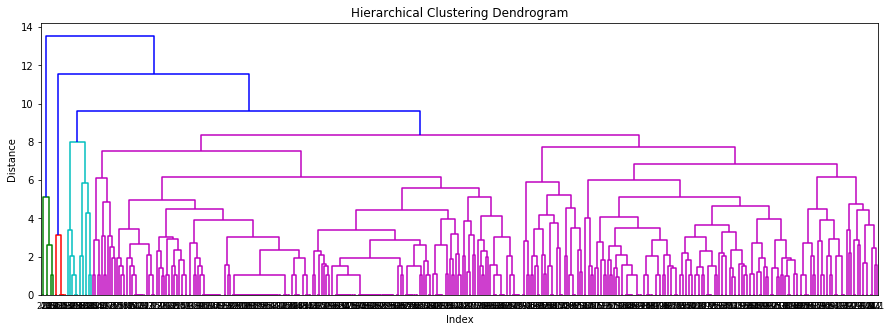

In [44]:
plt.figure(figsize=(15, 5));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(
    z,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [45]:
from sklearn.cluster import AgglomerativeClustering 

In [46]:
h_complete	= AgglomerativeClustering(n_clusters=5, linkage='complete',affinity = "euclidean").fit(df_norm) 

In [47]:
cluster_labels=pd.Series(h_complete.labels_)

In [48]:
mavoix['clust']=cluster_labels

In [32]:
mavoix = mavoix.iloc[:,[15,0,2,3,4,5,6,7,8,9,10,11,12,13,14]]

In [33]:
mavoix.head()

,Other skills,Application_ID,Python (out of 3),R Programming (out of 3),Deep Learning (out of 3),PHP (out of 3),MySQL (out of 3),HTML (out of 3),CSS (out of 3),JavaScript (out of 3),AJAX (out of 3),Bootstrap (out of 3),MongoDB (out of 3),Node.js (out of 3),ReactJS (out of 3)
0,R Programming,ML0001,0,2,0,2,0,2,3,2,0,2,0,0,0
1,"Data Science, Machine Learning, Neural Network...",ML0002,2,0,0,2,2,2,2,2,0,0,0,0,0
2,"Algorithms, Data Structures, Python, C Program...",ML0003,3,0,1,2,2,2,0,2,0,0,0,0,0
3,"CSS, Deep Learning, Embedded Systems, HTML, Ma...",ML0004,2,0,2,1,0,2,0,0,0,0,0,0,0
4,"HTML, OpenCV, Python, SQL, C++ Programming, CS...",ML0005,2,0,0,2,0,2,1,1,0,0,2,2,2


In [56]:
mavoix.iloc[:,2:].groupby(mavoix.clust).median()

,Python (out of 3),R Programming (out of 3),Deep Learning (out of 3),PHP (out of 3),MySQL (out of 3),HTML (out of 3),CSS (out of 3),JavaScript (out of 3),AJAX (out of 3),Bootstrap (out of 3),MongoDB (out of 3),Node.js (out of 3),ReactJS (out of 3),Current Year Of Graduation,clust
clust,,,,,,,,,,,,,,,
0,2.0,0.0,0.0,1.0,2.5,2.5,2.0,2.0,0.0,1.0,0.0,2.0,0.0,2019.0,0.0
1,2.0,0.0,0.0,1.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,2019.0,1.0
2,2.0,0.0,0.0,0.0,2.0,2.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,2020.0,2.0
3,1.5,0.0,0.0,2.0,2.0,3.0,3.0,2.0,0.0,2.0,2.0,2.0,0.0,2019.0,3.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019.0,4.0
